In [1]:
# interaction with operation system
import os
import sys
# allow python to access the paths of our/other python scripts
# sys.path.append('../../emg2pose/emg2pose/') # use this if you have torch installed

# data manipulation/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom script
from data import *

### Loading the data

In [2]:
datadir = '../data/emg2pose_dataset_mini/' #stored in the data respository 
datalist = os.listdir(datadir) # list of datafiles in the directory

print('Working on dataset: ', datalist[0])
datah5 = Emg2PoseSessionData(os.path.join(datadir, datalist[0]))


Working on dataset:  2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right.hdf5


### Exploring the data

In [70]:
dir(datah5)
# print(datah5.no_ik_failure)
# print(datah5.slice)

['DATASET_NAME',
 'EMG',
 'END_TIME',
 'HDF5_GROUP',
 'JOINT_ANGLES',
 'NUM_CHANNELS',
 'SAMPLE_RATE',
 'SESSION_NAME',
 'SIDE',
 'STAGE',
 'START_TIME',
 'TIMESERIES',
 'TIMESTAMPS',
 'USER',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_file',
 'fields',
 'hdf5_path',
 'metadata',
 'no_ik_failure',
 'session_name',
 'slice',
 'timeseries',
 'timestamps',
 'user']

In [63]:
metadata = datah5.metadata
print('Metadata: ')
for key, val in metadata.items():
    print('\t', key, ':', val)

Metadata: 
	 end : 1670314959.5166667
	 filename : 2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right
	 generalization : user
	 held_out_stage : False
	 held_out_user : True
	 moving_hand : both
	 num_channels : 16
	 sample_rate : 2000.0
	 session : 2022-12-06-1670313600-e3096-cv-emg-pose-train@2
	 side : right
	 split : val
	 stage : TwoHandedFreeStyle
	 start : 1670314722.55
	 user : d387095792


In [165]:
import pandas as pd

df = pd.read_csv(os.path.join(datadir, 'metadata.csv'))
print('total sessions: ', len(df))

print('\nParticipants: ', len(np.unique(df['user'])))

print('\nStages: ', len(np.unique(df['stage'])))
print(np.unique(df['stage']))


df.head(10)

total sessions:  25253

Participants:  193

Stages:  29
['AllFingerPinchesThumbSwipeThumbRotate' 'CoffeePanicPete'
 'CountingUpDownFaceSideAway' 'CountingUpDownFingerWigglingSpreading'
 'DoorknobFingerGraspFistGrab' 'FastPongFronthandBackhandThrowing'
 'FingerAbductionSeries' 'FingerFreeform'
 'FingerPinchesSingleFingerPinchesMultiple' 'FingerTouchPalmClapmrburns'
 'FingerWigglingSpreading' 'GraspPunchCloseFar' 'HandClawGraspFlicks'
 'HandDeskSeparateClaspedChest'
 'HandOverHandAllFingerPinchesThumbSwipeThumbRotate'
 'HandOverHandCountingUpDownFingerWigglingSpreading'
 'HookEmHornsOKScissors' 'IndexPinchesMiddlePinchesThumbswipes'
 'IndividualFingerPointingSnap' 'OneHandedFreeStyle' 'PlayBlocksChess'
 'PokeDrawPinchRotateclosefar' 'PokePinchCloseFar' 'ShakaVulcanPeace'
 'ThumbsSwipesWholeHand' 'ThumbsUpDownThumbRotationsCWCCWP'
 'TwoHandedFreeStyle' 'WristFlexionAbduction' 'unconstrained']


,session,user,stage,start,end,side,filename,moving_hand,held_out_user,held_out_stage,split,generalization
0,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
1,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
2,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
3,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
4,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ShakaVulcanPeace,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
5,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ShakaVulcanPeace,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
6,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
7,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
8,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649315e+09,1.649315e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
9,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649315e+09,1.649315e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage


### Plotting the data

Timestamp shape: (473792,)
EMG shape: (473792, 16)
Jointangle shape: (473792, 20)


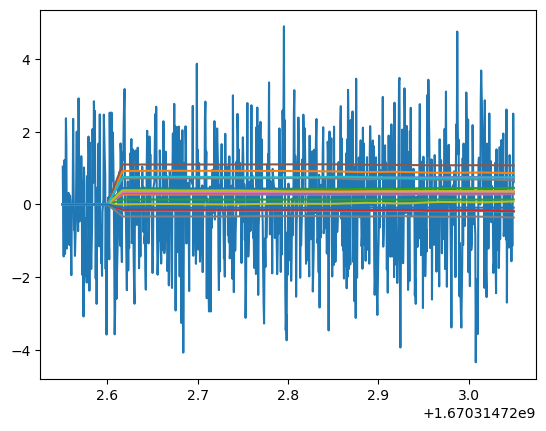

In [91]:
timestmp = datah5.timeseries[datah5.TIMESTAMPS] # nsamples vector
emgdata =  datah5.timeseries[datah5.EMG] # 2darray nsamples x nchannels?
jointangle = datah5.timeseries[datah5.JOINT_ANGLES] # 2darray nsamples x njoints?

print('Timestamp shape:' ,timestmp.shape)
print('EMG shape:' , emgdata.shape)
print('Jointangle shape:', jointangle.shape)

plt.plot(timestmp[:1000], emgdata[:1000,0])
plt.plot(timestmp[:1000], jointangle[:1000,:])
plt.show()


Recording freq 2000 Hz


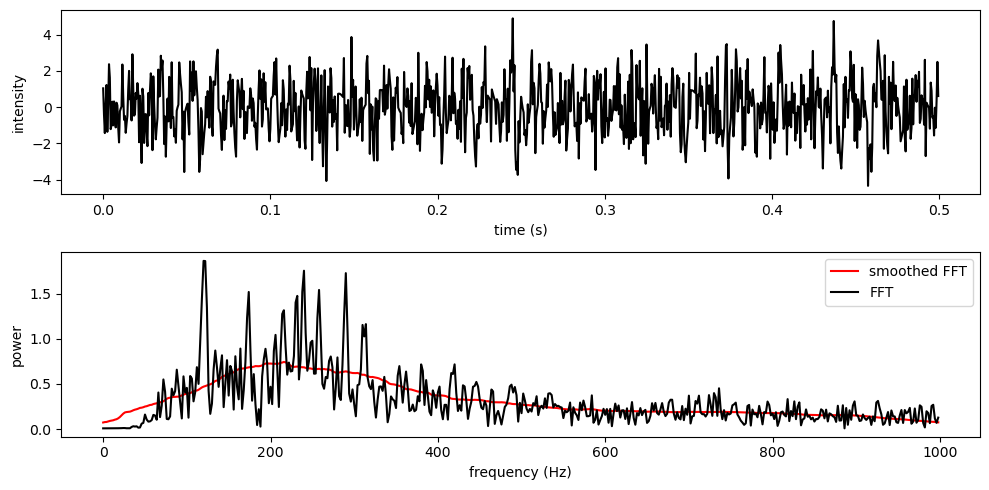

In [92]:
from scipy.fft import fft, fftfreq

#deterime samplerate from timestamps
samplerate = metadata['sample_rate']
print('Recording freq {} Hz'.format(int(samplerate)))

N = int(samplerate/2) #Nyquist limit
T = 1.0 / samplerate
time = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(emgdata[:int(samplerate),0]) # Fourier transform
xf = fftfreq(N, T)[:N//2] # Frequencies of the transform

fig, axs = plt.subplots(2,1,figsize=(10,5))

axs[0].plot(time[:N], emgdata[:N,0], color='black') #data plot
axs[0].set_ylabel('intensity')
axs[0].set_xlabel('time (s)')

smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100)/100, mode='same') # moving average of freq space

axs[1].plot(xf, smoothy, color='red', alpha=1, label = 'smoothed FFT') #data plot
axs[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='black', alpha=1, label = 'FFT') #data plot
axs[1].set_ylabel('power')
axs[1].set_xlabel('frequency (Hz)')
axs[1].legend()
plt.tight_layout()
plt.show()



236.896 sec of data
3.9482666666666666 min of data


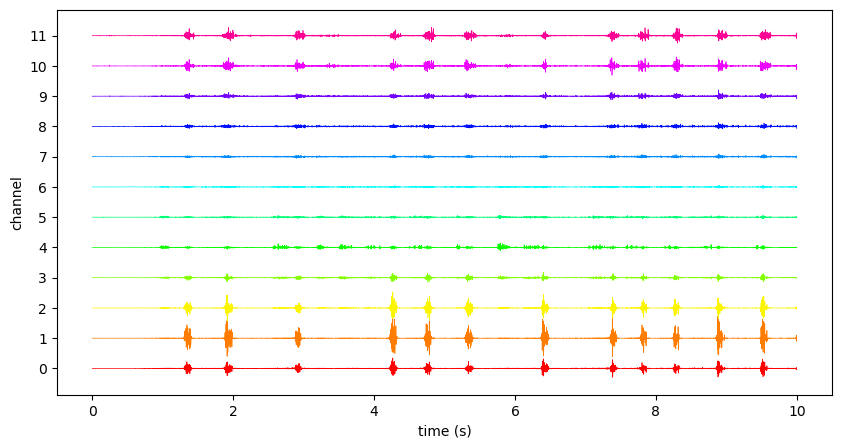

In [132]:
# plot all channels for a length of data
length = 10 #seconds

print(emgdata.shape[0]/samplerate, 'sec of data')
print(emgdata.shape[0]/samplerate/60, 'min of data')

N = int(samplerate * length) #n values
T = 1.0 / samplerate
time = np.linspace(0.0, N, N, endpoint=False) * T

import matplotlib as mpl
cmap = mpl.colormaps['hsv']

fig = plt.figure(figsize=(10,5))
for i in range(12):
    plt.plot(time, emgdata[:N,i] + i*2000, linewidth=0.5, color=cmap(i/12))
plt.yticks(2000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()

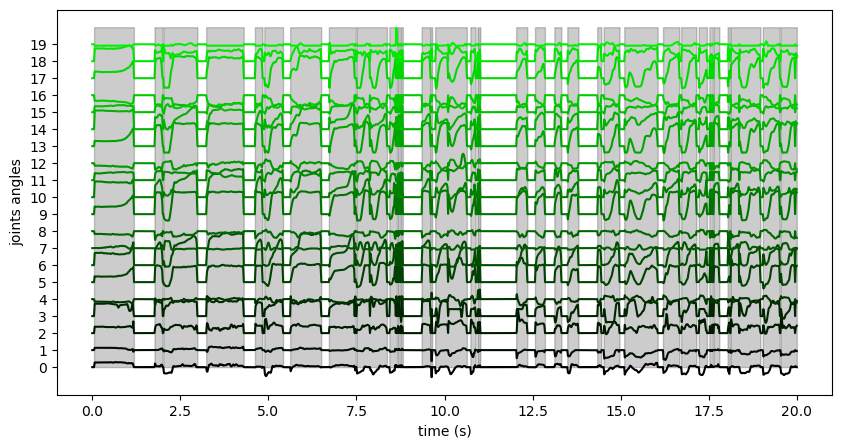

In [158]:
# Find when the hand is moving
# TAKEN FROM emg2pose utils
def get_contiguous_ones(binary_vector: np.ndarray) -> list[tuple[int, int]]:
    """Get a list of (start_idx, end_idx) for each contiguous block of True values."""
    if (binary_vector == 0).all():
        return []

    ones = np.where(binary_vector)[0]
    boundaries = np.where(np.diff(ones) != 1)[0]
    return [
        (ones[i], ones[j])
        for i, j in zip(
            np.insert(boundaries + 1, 0, 0), np.append(boundaries, len(ones) - 1)
        )
    ]
    
def get_ik_failures_mask(joint_angles: np.ndarray) -> np.ndarray:
    """Compute mask that is True where there are no ik failures."""
    zeros = np.zeros_like(joint_angles)  # (..., joint)
    is_zero = np.isclose(joint_angles, zeros)
    return ~np.all(is_zero, axis=-1)

angle_mask = get_ik_failures_mask(jointangle)

change_in_angle = np.diff(jointangle, axis=0)

fig = plt.figure(figsize=(10,5))
for i in range(20):
    plt.plot(time, jointangle[:N,i] + i, color=(0,i/20,0))
plt.fill_between(time, angle_mask[:N]*20, np.zeros(N), color='k', alpha=0.2, zorder=0)  
plt.yticks(np.arange(20), np.arange(20))
plt.ylabel('joints angles')
plt.xlabel('time (s)')
plt.show()




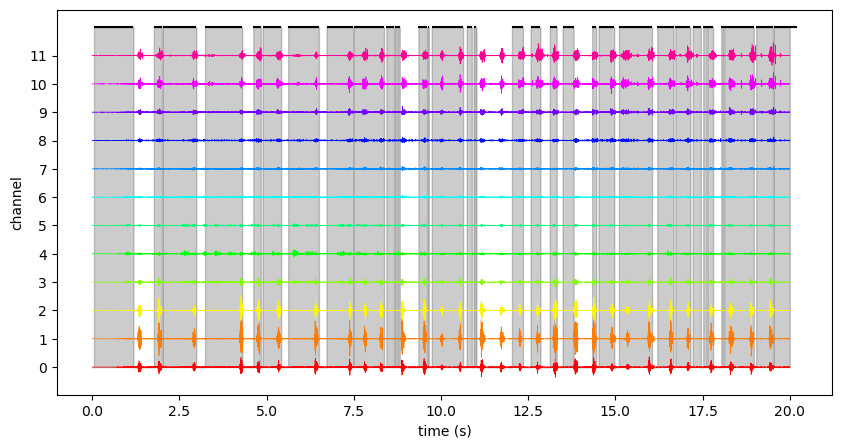

In [159]:
# Plot when hand is moving, and what the sensor detects

length = 20 #seconds
N = int(samplerate * length) #n values
T = 1.0 / samplerate
time = np.linspace(0.0, N, N, endpoint=False) * T

windows = get_contiguous_ones(angle_mask)

import matplotlib as mpl
cmap = mpl.colormaps['hsv']

fig = plt.figure(figsize=(10,5))
for i in range(12):
    plt.plot(time, emgdata[:N,i] + i*2000, linewidth=0.5, color=cmap(i/12), zorder=10) 
plt.fill_between(time, angle_mask[:N]*12*2000, np.zeros(N), color='k', alpha=0.2, zorder=0)  
for window in windows:
    if window[0]<N:
        plt.hlines(12*2000, window[0]/samplerate, window[1]/samplerate, color='k')    

plt.yticks(2000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()



### Zoom in on a couple events

Location of first event:  1.31


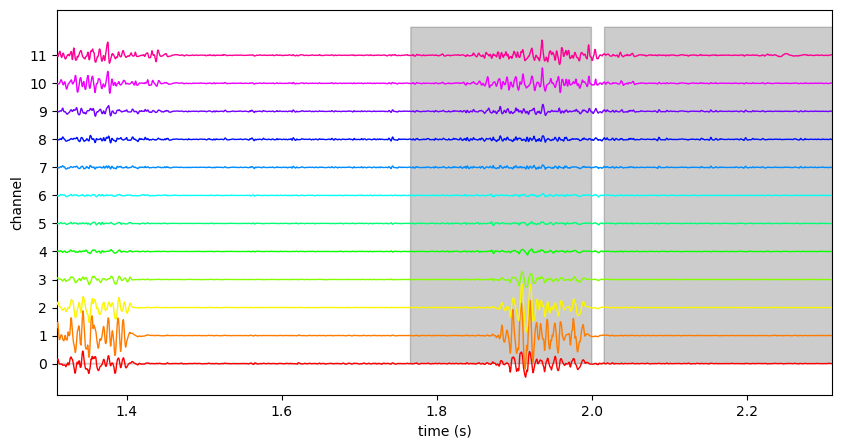

In [157]:
firstone = np.where(np.sum(emgdata[:N,:], axis=1)>500)[0][0]
print('Location of first event: ', firstone/samplerate)
window = firstone + 2000
fig = plt.figure(figsize=(10,5))
for i in range(12):
    plt.plot(time[firstone:window], emgdata[firstone:window,i] + i*1000, 
             linewidth=1, color=cmap(i/12), zorder=10) 
plt.fill_between(time, angle_mask[:N]*12*1000, np.zeros(N), color='k', alpha=0.2, zorder=0)  
plt.xlim(firstone/samplerate, window/samplerate)
plt.yticks(1000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()
